In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


    director 2634
    cast 825
    country 831
    date added 10
    rating 4
    duration 3
     these are null values

In [3]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
print(df.columns)



Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [5]:
# Fill missing values 
df["country"] = df["country"].fillna("Unknown")
df["date_added"] = df["date_added"].fillna(df["date_added"].mode()[0])
df["rating"] = df["rating"].fillna(df["rating"].mode()[0])
df["duration"] = df["duration"].fillna(df["duration"].mode()[0])

# Check again
print(df.isnull().sum())


show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64


In [6]:
print(df.shape) # it tells  rows and col in your table
print(df.info()) # tells null value in table
df.head()


(8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<Axes: title={'center': 'Movies  vs Tv shows'}, xlabel='type'>

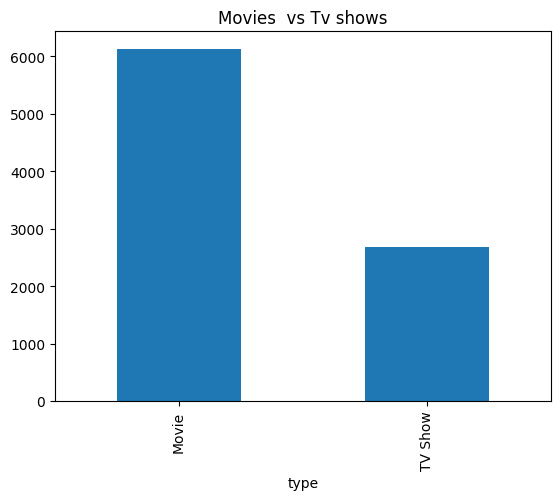

In [7]:
# count movies vs tv shows
df["type"].value_counts().plot(kind = "bar", title="Movies  vs Tv shows")

in this visulaization movie watch rate is high as compare to tv show

<Axes: title={'center': 'Top Ratings'}, xlabel='rating'>

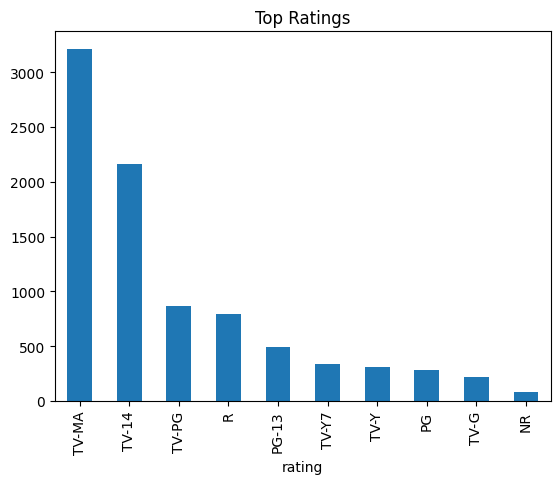

In [8]:
# ratings
df["rating"].value_counts().head(10).plot(kind="bar", title="Top Ratings")

most ratings in this table of shows

<Axes: title={'center': 'Top 10 countries'}, ylabel='country'>

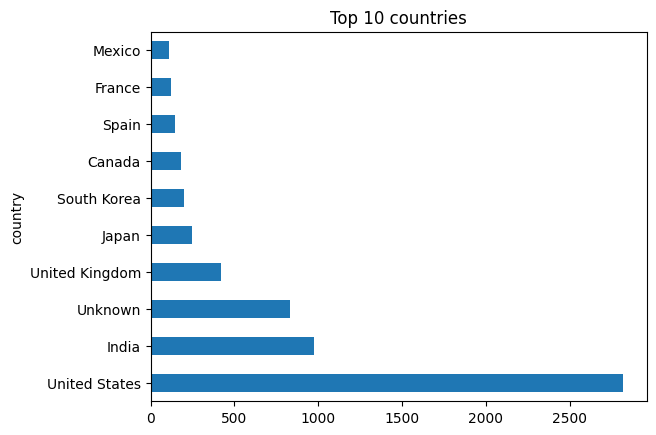

In [9]:
# 10 countries with most content
df["country"].value_counts().head(10).plot(kind="barh", title="Top 10 countries")

us have more content then mexico and these are univert analysis means one column analysis like ratings countries tv or netflix etc 

In [10]:
print(df.shape)
print(df.info())
print(df.head)


(8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
<bound method NDFrame.head of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s

<Axes: title={'center': 'Content Added Over Time'}, xlabel='year', ylabel='Number Of Shows'>

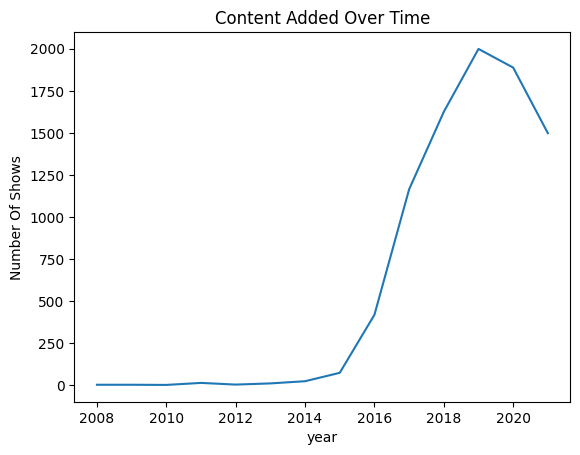

In [11]:
df["date_added"]=pd.to_datetime(df["date_added"],errors="coerce")
#extract year
df["year_added"]=df["date_added"].dt.year
#count show [er year and plot
df["year_added"].value_counts().sort_index().plot(kind="line",
                            title="Content Added Over Time",
                            ylabel="Number Of Shows",
                            xlabel="year"                     )

How much content add in a year  this is biverate analyis 

<Axes: title={'center': 'Movies vs TV Shows Over Time'}, xlabel='year_added'>

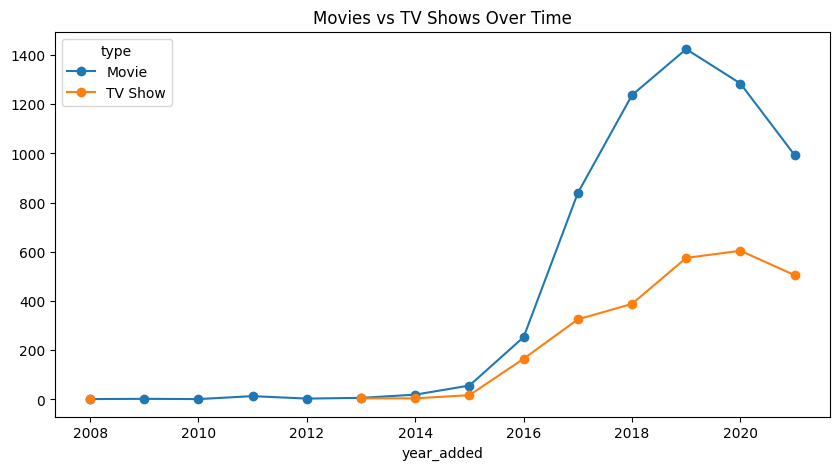

In [12]:
df.groupby(["year_added", "type"])["title"].count().unstack().plot(
    kind="line",
    figsize=(10,5),
    marker='o',
    title="Movies vs TV Shows Over Time"
)


netflix or tv shows which is increasing over times 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


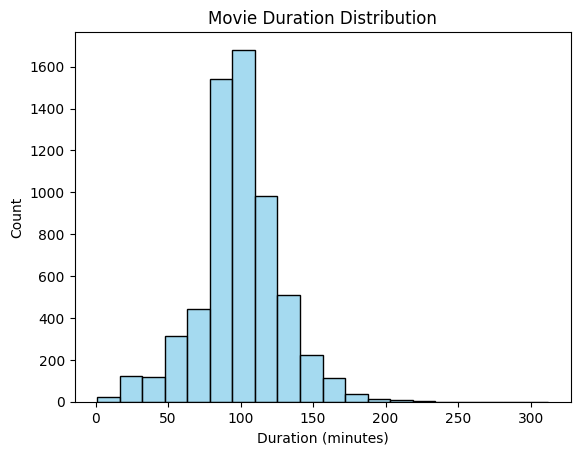

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


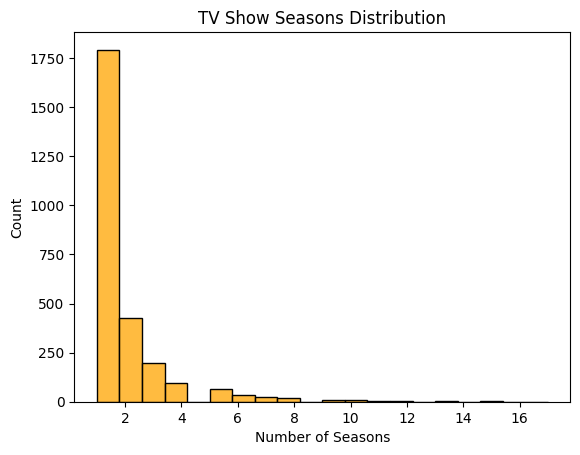

In [13]:
#duration of tv shows and movies
df["duration_num"]=df["duration"].str.extract('(\d+)').astype(float)

# Movies duration distribution
sns.histplot(df[df['type']=='Movie']['duration_num'], bins=20, color='skyblue')
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.show()

# TV Shows duration (Seasons) distribution
sns.histplot(df[df['type']=='TV Show']['duration_num'], bins=20, color='orange')
plt.title("TV Show Seasons Distribution")
plt.xlabel("Number of Seasons")
plt.show()


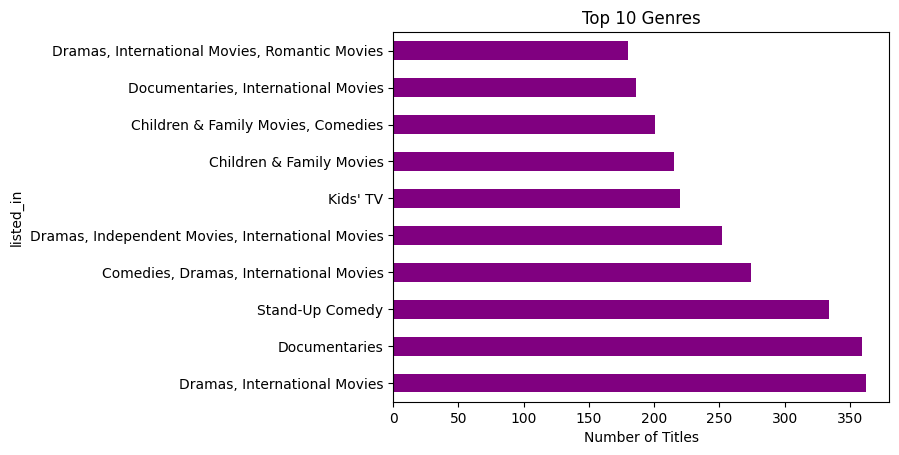

In [14]:
# genere which dominated more on netflix categ analysis
df['listed_in'].value_counts().head(10).plot(kind='barh', color='purple', title='Top 10 Genres')
plt.xlabel("Number of Titles")
plt.show()


Top genere  saw on netflix

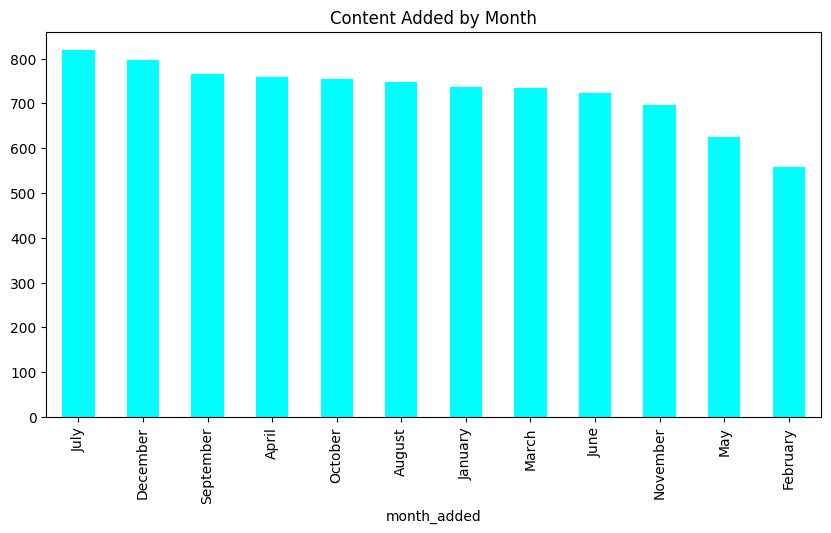

In [15]:
df['month_added'] = df['date_added'].dt.month_name()
df['month_added'].value_counts().plot(kind='bar', figsize=(10,5), color='cyan', title='Content Added by Month')
plt.show()


It tells  how much content added in months

## Key Insights

1. **Content Type**
- Movies dominate over TV Shows on Netflix.
- The number of movies uploaded each year is higher than TV shows.

2. **Countries**
- The United States produces the most Netflix content.
- Other top countries include India, Mexico, and the United Kingdom.

3. **Genres / Categories**
- The most common genres are **Documentaries, Dramas, and International TV Shows**.
- Netflix focuses on a mix of entertainment and educational content.

4. **Ratings**
- Most content falls under ratings **TV-MA, PG-13, and TV-14**.
- Suggests content is targeted mostly for teens and adults.

5. **Duration / Seasons**
- Most movies are between **90–120 minutes**.
- Most TV shows have **1–3 seasons**, indicating short series are common.

6. **Content Added Over Time**
- Netflix content additions increased rapidly after **2015**.
- Shows a growing expansion of content library over the years.

7. **Other Observations**
- Some shows/movies had missing country or duration info, but filling these with “Unknown” or mode helped clean the dataset.
- Insights can help understand **trends, viewer preferences, and Netflix content strategy**.
